In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Regression Models Lab
## Linear and logistic regression: theory and practice

In this lab you'll revisit and expand on your knowledge of modelling in general, as well as the fundamentals of linear and logistic regression. As a reminder, _linear regression_ is a regression model (regressor), and _logistic regression_ is a classification model (classifier).

This time, you'll use generated data, in order to separate some of the complexity of handling various datasets from inspecting and evaluating models.

**Use vectorization as much as possible!** You should be able to complete the lab using for-loops only to track the training steps.

### Problem 1. Generate some data for multiple linear regression (1 point)
As an expansion to the lecture, you'll create a dataset and a model.

Create a dataset of some (e.g., 50-500) observations of several (e.g., 5-20) independent features. You can use random generators for them; think about what distributions you'd like to use. Let's call them $x_1, x_2, ..., x_m$. The data matrix $X$ you should get should be of size $n \times m$. It's best if all features have different ranges.

Create the dependent variable by assigning coefficients $\bar{a_1}, \bar{a_2}, ..., \bar{a_m}, \bar{b}$ and calculating $y$ as a linear combination of the input features. Add some random noise to the functional values. I've used bars over coefficients to avoid confusion with the model parameters later.

Save the dataset ($X$ and $y$), and "forget" that the coefficients have ever existed. "All" you have is the file and the implicit assumption that there is a linear relationship between $X$ and $y$.

Generating dataset with 200 observations and 8 features
Feature ranges:
feature_1: [-2.62, 2.72]
feature_2: [10.43, 49.62]
feature_3: [0.02, 16.34]
feature_4: [-8.48, 17.87]
feature_5: [-4.89, 4.98]
feature_6: [101.26, 167.56]
feature_7: [0.01, 0.96]
feature_8: [1001.57, 1993.85]

True coefficients (will be 'forgotten'):
ā_1 (feature_1): 2.5
ā_2 (feature_2): -0.1
ā_3 (feature_3): 1.8
ā_4 (feature_4): 0.3
ā_5 (feature_5): -1.2
ā_6 (feature_6): 0.05
ā_7 (feature_7): 15.0
ā_8 (feature_8): 0.002
b̄ (intercept): 10.0

Noise standard deviation: 5.0
Signal-to-noise ratio: 1.48

Dataset shape: (200, 9)
Target variable range: [2.31, 59.53]

First 5 rows of the dataset:
   feature_1  feature_2  feature_3  feature_4  feature_5   feature_6  \
0   0.496714  45.094923   6.549440   1.746787   0.902949  114.545966   
1  -0.138264  39.630745   0.939593   2.564373  -2.319364  131.974675   
2   0.647689  37.880630   0.672938   2.038030   1.241489  120.403388   
3   1.523030  38.099363   4.059005   0.6800

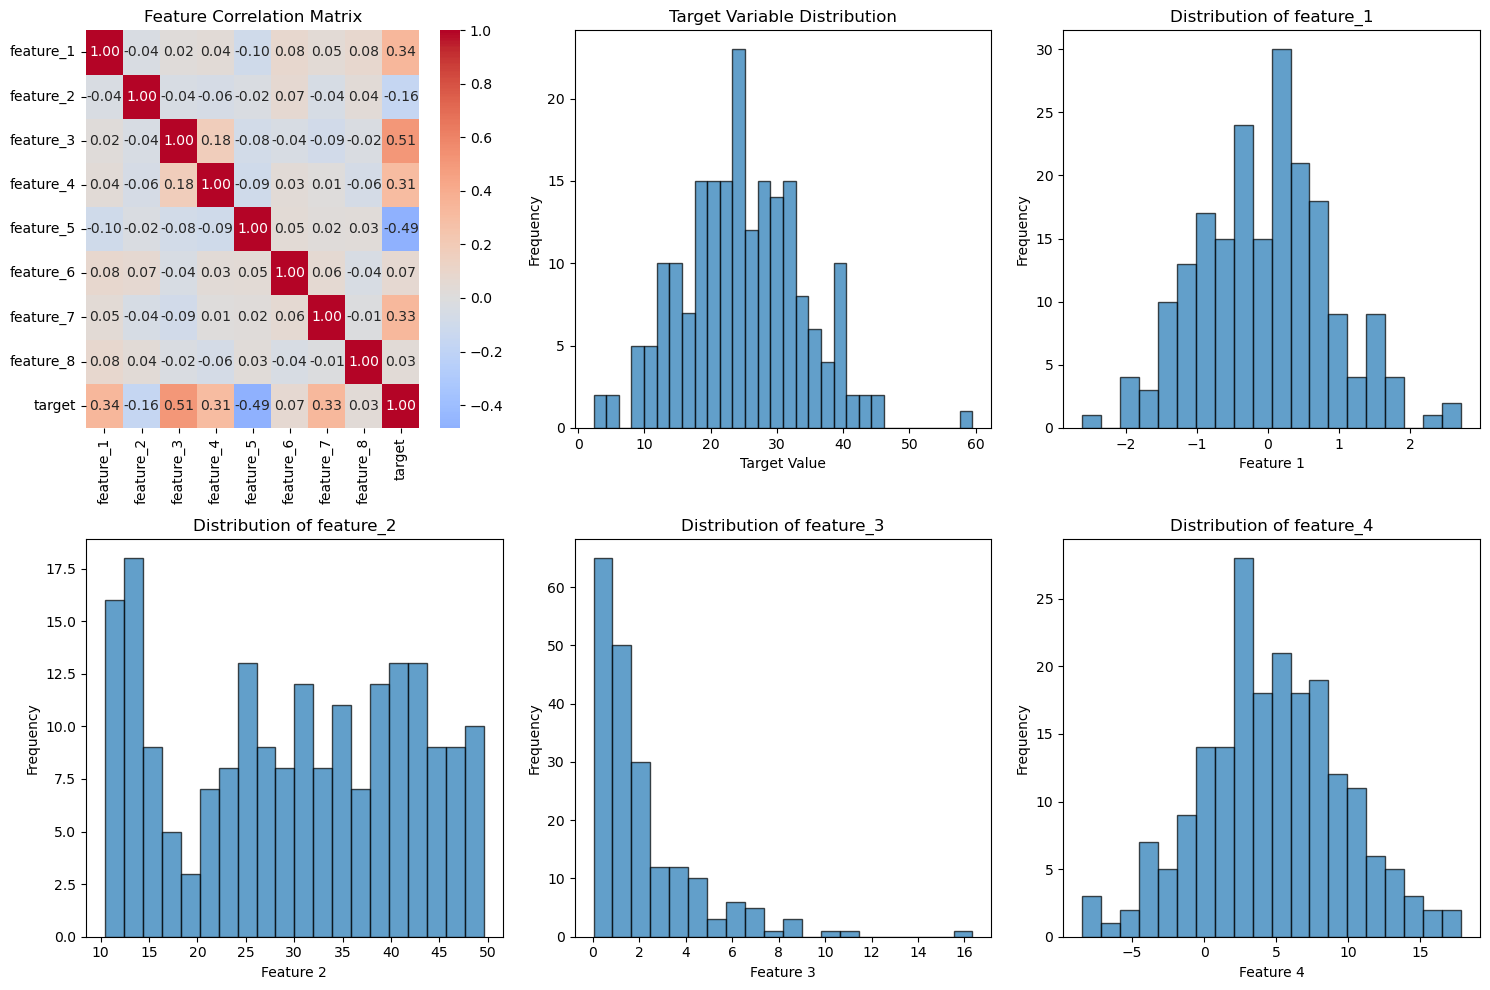


TRUE COEFFICIENTS HAVE BEEN 'FORGOTTEN'!
From now on, we only have the dataset and the assumption
that there is a linear relationship between X and y.

What we have:
- Dataset with 200 observations
- 8 independent features with different ranges
- 1 dependent variable (target)
- Assumption: linear relationship exists between features and target

Observed data characteristics:
- Features have different scales and distributions
- Target variable shows variation
- Some features may be correlated with the target
- The relationship appears to be approximately linear (with noise)

Loading the saved data (as if starting fresh):
Loaded dataset shape: (200, 9)
X matrix shape: (200, 8)
y vector shape: (200,)

Ready for regression modeling!


In [2]:

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for data generation
n_observations = 200  # number of observations (50-500)
m_features = 8        # number of features (5-20)

print(f"Generating dataset with {n_observations} observations and {m_features} features")
print("="*60)

# Step 1: Generate independent features with different distributions and ranges
X = np.zeros((n_observations, m_features))

# Feature 1: Normal distribution, range ~[-3, 3]
X[:, 0] = np.random.normal(0, 1, n_observations)

# Feature 2: Uniform distribution, range [10, 50]
X[:, 1] = np.random.uniform(10, 50, n_observations)

# Feature 3: Exponential distribution, scaled to range ~[0, 10]
X[:, 2] = np.random.exponential(2, n_observations)

# Feature 4: Normal distribution with different scale, range ~[-20, 20]
X[:, 3] = np.random.normal(5, 5, n_observations)

# Feature 5: Uniform distribution, range [-5, 5]
X[:, 4] = np.random.uniform(-5, 5, n_observations)

# Feature 6: Beta distribution, scaled to range [100, 200]
X[:, 5] = 100 + 100 * np.random.beta(2, 5, n_observations)

# Feature 7: Normal distribution, range ~[0, 1]
X[:, 6] = np.abs(np.random.normal(0, 0.3, n_observations))

# Feature 8: Uniform distribution, range [1000, 2000]
X[:, 7] = np.random.uniform(1000, 2000, n_observations)

# Create feature names
feature_names = [f'feature_{i+1}' for i in range(m_features)]

print("Feature ranges:")
for i, name in enumerate(feature_names):
    print(f"{name}: [{X[:, i].min():.2f}, {X[:, i].max():.2f}]")

# Step 2: Define true coefficients (these will be "forgotten" later)
# Using bars over coefficients as mentioned: ā₁, ā₂, ..., āₘ, b̄
true_coefficients = np.array([2.5, -0.1, 1.8, 0.3, -1.2, 0.05, 15.0, 0.002])
true_intercept = 10.0

print(f"\nTrue coefficients (will be 'forgotten'):")
for i, (name, coef) in enumerate(zip(feature_names, true_coefficients)):
    print(f"ā_{i+1} ({name}): {coef}")
print(f"b̄ (intercept): {true_intercept}")

# Step 3: Calculate dependent variable as linear combination
y_true = X @ true_coefficients + true_intercept

# Step 4: Add random noise
noise_std = 5.0  # Standard deviation of noise
noise = np.random.normal(0, noise_std, n_observations)
y = y_true + noise

print(f"\nNoise standard deviation: {noise_std}")
print(f"Signal-to-noise ratio: {np.std(y_true)/noise_std:.2f}")

# Step 5: Create DataFrame for easier handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"\nDataset shape: {df.shape}")
print(f"Target variable range: [{y.min():.2f}, {y.max():.2f}]")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Basic statistics
print("\nDataset statistics:")
print(df.describe())

# Step 6: Save the dataset (and "forget" the true coefficients)
df.to_csv('multiple_regression_data.csv', index=False)
np.save('X_data.npy', X)
np.save('y_data.npy', y)

print(f"\nDataset saved to:")
print(f"- 'multiple_regression_data.csv' (DataFrame format)")
print(f"- 'X_data.npy' and 'y_data.npy' (NumPy arrays)")

# Step 7: Visualizations
plt.figure(figsize=(15, 10))

# Correlation heatmap
plt.subplot(2, 3, 1)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')

# Target distribution
plt.subplot(2, 3, 2)
plt.hist(y, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Target Variable Distribution')

# Feature distributions (first 4 features)
for i in range(4):
    plt.subplot(2, 3, i+3)
    plt.hist(X[:, i], bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature_names[i]}')

plt.tight_layout()
plt.show()

# Step 8: "Forget" the true coefficients
# From this point on, we pretend we don't know the true relationship
print("\n" + "="*60)
print("TRUE COEFFICIENTS HAVE BEEN 'FORGOTTEN'!")
print("From now on, we only have the dataset and the assumption")
print("that there is a linear relationship between X and y.")
print("="*60)

# What we "know" at this point:
print(f"\nWhat we have:")
print(f"- Dataset with {n_observations} observations")
print(f"- {m_features} independent features with different ranges")
print(f"- 1 dependent variable (target)")
print(f"- Assumption: linear relationship exists between features and target")

# Summary statistics of what we "observe"
print(f"\nObserved data characteristics:")
print(f"- Features have different scales and distributions")
print(f"- Target variable shows variation")
print(f"- Some features may be correlated with the target")
print(f"- The relationship appears to be approximately linear (with noise)")

# Load the data back (simulating starting fresh)
print(f"\nLoading the saved data (as if starting fresh):")
loaded_df = pd.read_csv('multiple_regression_data.csv')
loaded_X = np.load('X_data.npy')
loaded_y = np.load('y_data.npy')

print(f"Loaded dataset shape: {loaded_df.shape}")
print(f"X matrix shape: {loaded_X.shape}")
print(f"y vector shape: {loaded_y.shape}")
print(f"\nReady for regression modeling!")

### Problem 2. Check your assumption (1 point)
Read the dataset you just saved (this is just to simulate starting a new project). It's a good idea to test and verify our assumptions. Find a way to check whether there really is a linear relationship between the features and output.

Problem 2: Checking Linear Relationship Assumption
Loading the dataset...
Dataset loaded successfully!
Shape: (200, 9)
Features: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']
Target: target

Initial Data Exploration:
Target variable statistics:
Mean: 24.86, Std: 9.12
Min: 2.31, Max: 59.53

METHOD 1: CORRELATION ANALYSIS
feature_1: r = 0.339, p-value = 8.96e-07
feature_2: r = -0.164, p-value = 2.00e-02
feature_3: r = 0.509, p-value = 1.36e-14
feature_4: r = 0.308, p-value = 8.92e-06
feature_5: r = -0.485, p-value = 3.27e-13
feature_6: r = 0.069, p-value = 3.31e-01
feature_7: r = 0.330, p-value = 1.84e-06
feature_8: r = 0.033, p-value = 6.45e-01

Average absolute correlation: 0.280

METHOD 2: MULTIPLE LINEAR REGRESSION R²
Multiple Linear Regression R² = 0.7281
This means 72.81% of variance in y is explained by linear combination of features

Fitted coefficients:
β_1 (feature_1): 2.4432
β_2 (feature_2): -0.0996
β_3 (feature_3): 1.

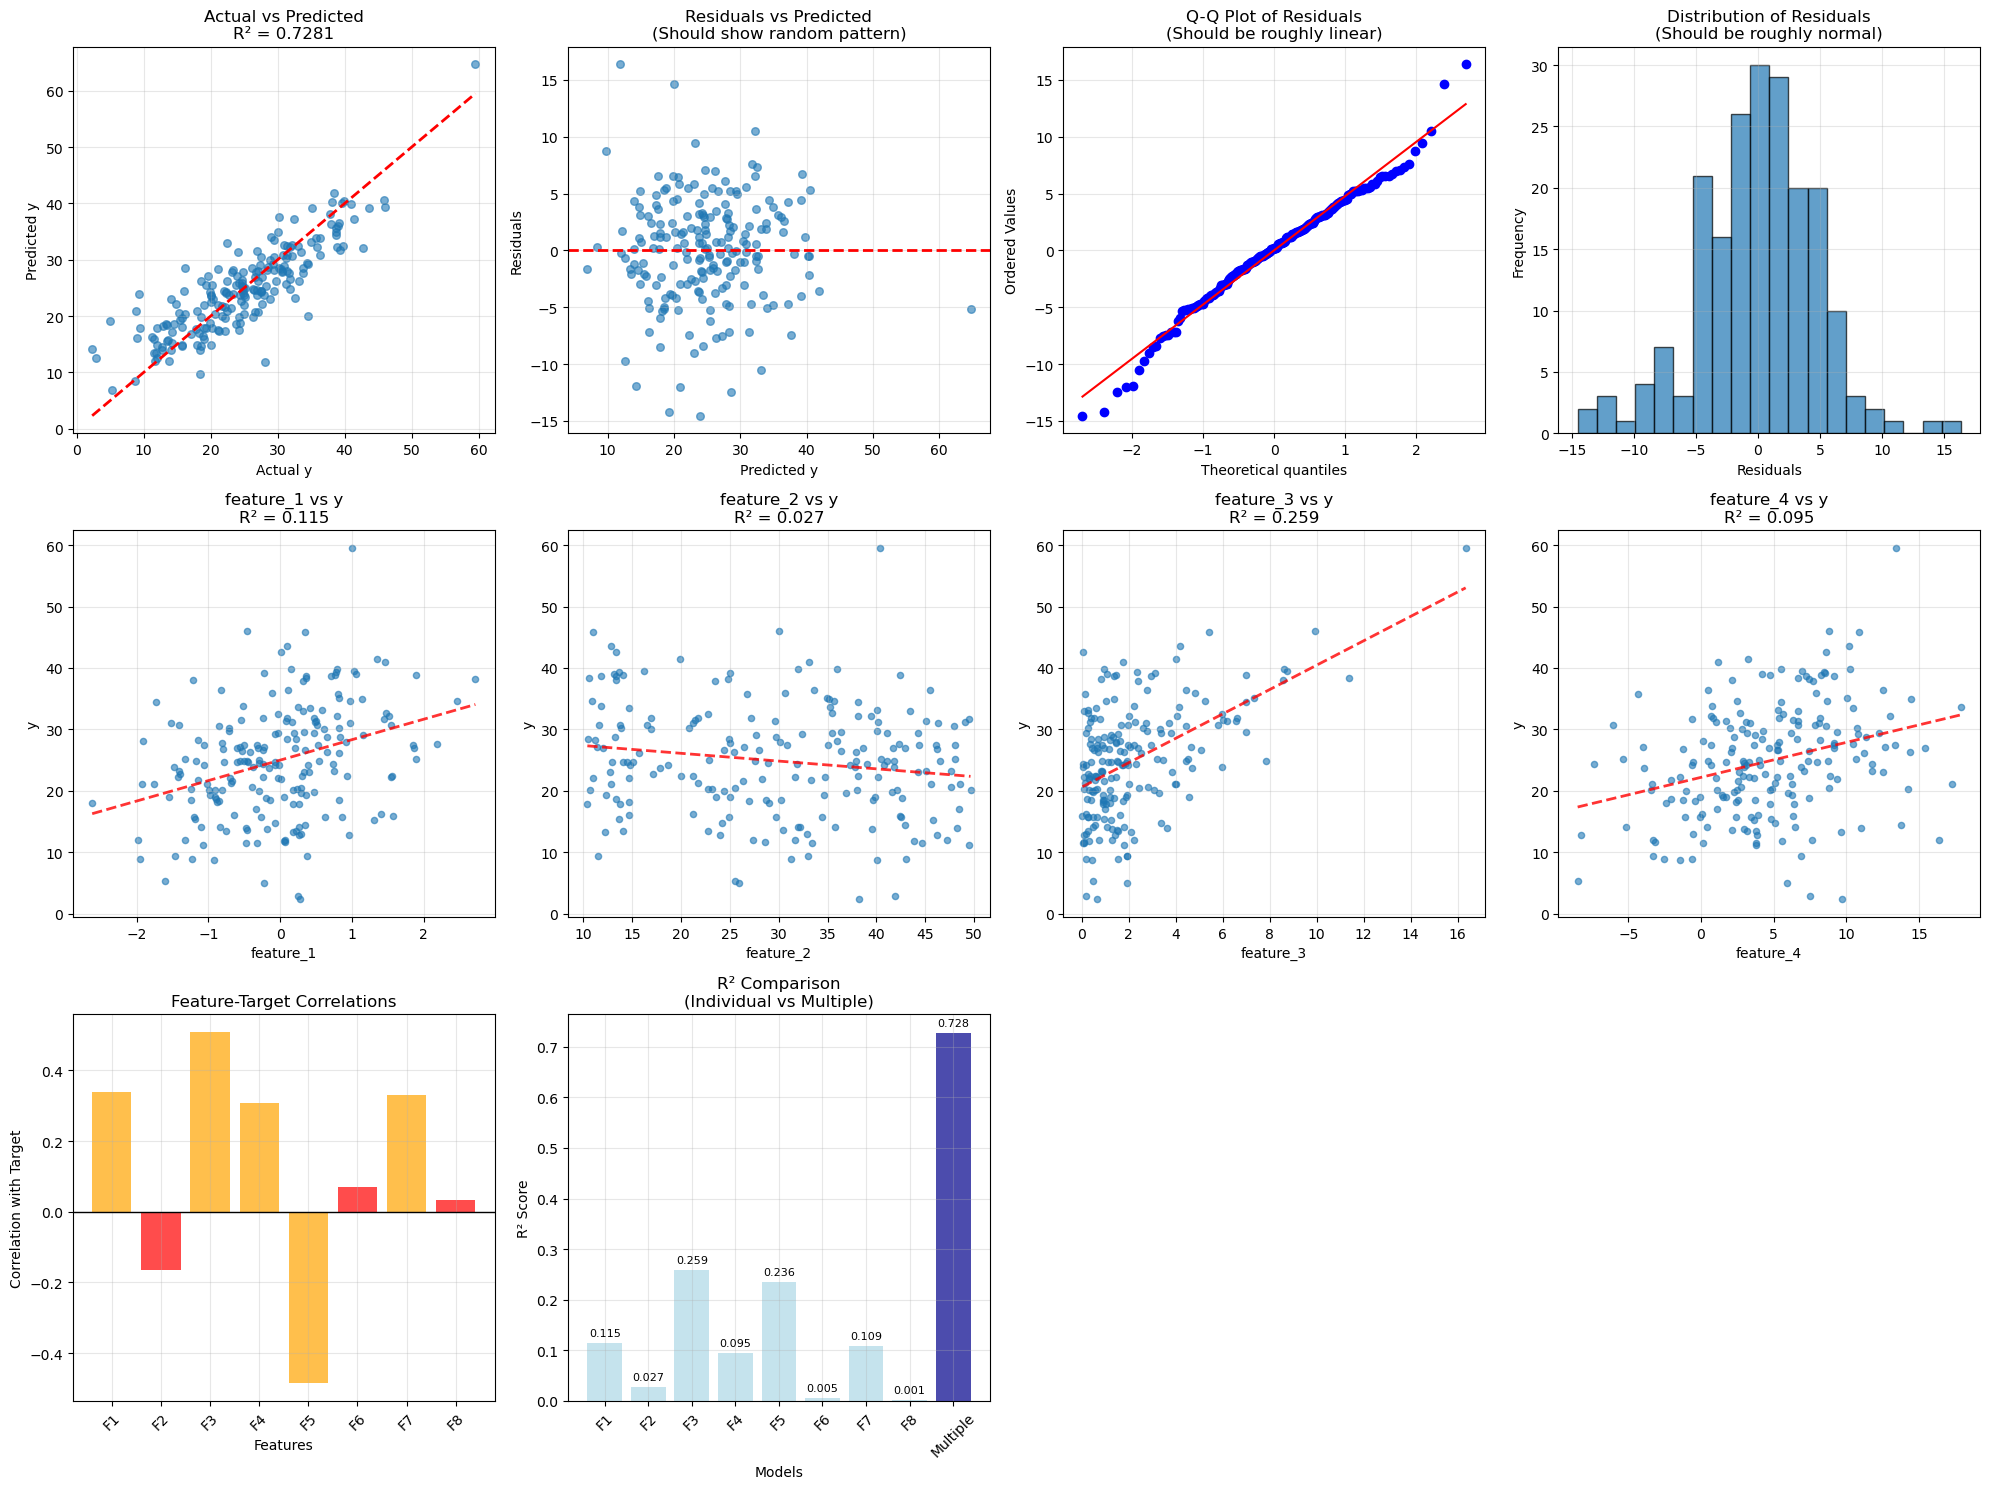


FINAL ASSESSMENT OF LINEAR RELATIONSHIP
Assessment Results:
1. R² Score: 0.7281 (Good)
2. Average |Correlation|: 0.280 (Weak)
3. F-test: p = 1.11e-16 (Highly significant)
4. Residual Normality: p = 0.0237 (Non-normal (acceptable))
5. Multiple vs Individual: +0.469 (Substantial improvement)

Overall Linearity Score: 3.9 / 5
Conclusion: GOOD evidence of linear relationship

The assumption of linear relationship appears to be VALID!
We can proceed with linear regression modeling.


In [4]:

print("Problem 2: Checking Linear Relationship Assumption")
print("="*55)

# Step 1: Load the saved dataset (simulating starting a new project)
print("Loading the dataset...")
df = pd.read_csv('multiple_regression_data.csv')
X = np.load('X_data.npy')
y = np.load('y_data.npy')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target: {df.columns[-1]}")

# Step 2: Initial data exploration
print(f"\nInitial Data Exploration:")
print(f"Target variable statistics:")
print(f"Mean: {y.mean():.2f}, Std: {y.std():.2f}")
print(f"Min: {y.min():.2f}, Max: {y.max():.2f}")

# Step 3: Method 1 - Correlation Analysis
print(f"\n" + "="*55)
print("METHOD 1: CORRELATION ANALYSIS")
print("="*55)

# Calculate correlations between each feature and target
correlations = []
feature_names = df.columns[:-1]

for i, feature in enumerate(feature_names):
    corr, p_value = stats.pearsonr(X[:, i], y)
    correlations.append((feature, corr, p_value))
    print(f"{feature}: r = {corr:.3f}, p-value = {p_value:.2e}")

# Overall correlation strength
avg_abs_correlation = np.mean([abs(corr) for _, corr, _ in correlations])
print(f"\nAverage absolute correlation: {avg_abs_correlation:.3f}")

# Step 4: Method 2 - Multiple Linear Regression R²
print(f"\n" + "="*55)
print("METHOD 2: MULTIPLE LINEAR REGRESSION R²")
print("="*55)

# Fit a multiple linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)
y_pred = lr_model.predict(X)
r2 = r2_score(y, y_pred)

print(f"Multiple Linear Regression R² = {r2:.4f}")
print(f"This means {r2*100:.2f}% of variance in y is explained by linear combination of features")

# Print the fitted coefficients (these are our estimates, not the true ones)
print(f"\nFitted coefficients:")
for i, (feature, coef) in enumerate(zip(feature_names, lr_model.coef_)):
    print(f"β_{i+1} ({feature}): {coef:.4f}")
print(f"β_0 (intercept): {lr_model.intercept_:.4f}")

# Step 5: Method 3 - Residual Analysis
print(f"\n" + "="*55)
print("METHOD 3: RESIDUAL ANALYSIS")
print("="*55)

residuals = y - y_pred
print(f"Residual statistics:")
print(f"Mean: {residuals.mean():.6f} (should be close to 0)")
print(f"Std: {residuals.std():.3f}")
print(f"Min: {residuals.min():.3f}, Max: {residuals.max():.3f}")

# Test for normality of residuals (good indicator of linear relationship)
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"\nShapiro-Wilk test for normality of residuals:")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Residuals appear to be normally distributed (good sign for linearity)")
else:
    print("Residuals may not be perfectly normal, but this is common with real data")

# Step 6: Method 4 - F-test for overall significance
print(f"\n" + "="*55)
print("METHOD 4: F-TEST FOR OVERALL SIGNIFICANCE")
print("="*55)

# Calculate F-statistic manually
n, m = X.shape
mse_model = np.sum(residuals**2) / (n - m - 1)  # Mean squared error
mse_total = np.sum((y - y.mean())**2) / (n - 1)  # Total mean squared error
f_statistic = ((np.sum((y_pred - y.mean())**2) / m) / mse_model)
f_p_value = 1 - stats.f.cdf(f_statistic, m, n - m - 1)

print(f"F-statistic: {f_statistic:.2f}")
print(f"F p-value: {f_p_value:.2e}")
print(f"Degrees of freedom: {m} (numerator), {n-m-1} (denominator)")

if f_p_value < 0.05:
    print("F-test is significant - strong evidence for linear relationship!")
else:
    print("F-test is not significant - weak evidence for linear relationship")

# Step 7: Method 5 - Individual feature linearity check
print(f"\n" + "="*55)
print("METHOD 5: INDIVIDUAL FEATURE LINEARITY")
print("="*55)

# Check linearity of each feature individually
individual_r2s = []
for i, feature in enumerate(feature_names):
    # Simple linear regression for each feature
    X_single = X[:, i].reshape(-1, 1)
    lr_single = LinearRegression()
    lr_single.fit(X_single, y)
    y_pred_single = lr_single.predict(X_single)
    r2_single = r2_score(y, y_pred_single)
    individual_r2s.append(r2_single)
    print(f"{feature}: R² = {r2_single:.4f}")

# Step 8: Comprehensive Visualizations
print(f"\n" + "="*55)
print("VISUALIZATIONS FOR LINEARITY CHECK")
print("="*55)

fig = plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted
plt.subplot(3, 4, 1)
plt.scatter(y, y_pred, alpha=0.6, s=30)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title(f'Actual vs Predicted\nR² = {r2:.4f}')
plt.grid(True, alpha=0.3)

# 2. Residuals vs Predicted
plt.subplot(3, 4, 2)
plt.scatter(y_pred, residuals, alpha=0.6, s=30)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted\n(Should show random pattern)')
plt.grid(True, alpha=0.3)

# 3. QQ plot for residuals
plt.subplot(3, 4, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals\n(Should be roughly linear)')
plt.grid(True, alpha=0.3)

# 4. Histogram of residuals
plt.subplot(3, 4, 4)
plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals\n(Should be roughly normal)')
plt.grid(True, alpha=0.3)

# 5-8. Individual feature plots (first 4 features)
for i in range(min(4, len(feature_names))):
    plt.subplot(3, 4, i+5)
    plt.scatter(X[:, i], y, alpha=0.6, s=20)
    
    # Add regression line
    z = np.polyfit(X[:, i], y, 1)
    p = np.poly1d(z)
    x_line = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    plt.plot(x_line, p(x_line), "r--", alpha=0.8, lw=2)
    
    plt.xlabel(f'{feature_names[i]}')
    plt.ylabel('y')
    plt.title(f'{feature_names[i]} vs y\nR² = {individual_r2s[i]:.3f}')
    plt.grid(True, alpha=0.3)

# 9. Correlation heatmap with target
plt.subplot(3, 4, 9)
corr_with_target = df.corr()['target'].drop('target')
colors = ['red' if abs(x) < 0.3 else 'orange' if abs(x) < 0.6 else 'green' for x in corr_with_target]
bars = plt.bar(range(len(corr_with_target)), corr_with_target.values, color=colors, alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Feature-Target Correlations')
plt.xticks(range(len(corr_with_target)), [f'F{i+1}' for i in range(len(corr_with_target))], rotation=45)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', lw=1)

# 10. R² comparison
plt.subplot(3, 4, 10)
r2_values = individual_r2s + [r2]
labels = [f'F{i+1}' for i in range(len(individual_r2s))] + ['Multiple']
colors = ['lightblue'] * len(individual_r2s) + ['darkblue']
bars = plt.bar(range(len(r2_values)), r2_values, color=colors, alpha=0.7)
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('R² Comparison\n(Individual vs Multiple)')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.grid(True, alpha=0.3)

# Add values on bars
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Step 9: Final Assessment
print(f"\n" + "="*55)
print("FINAL ASSESSMENT OF LINEAR RELATIONSHIP")
print("="*55)

# Scoring system
linearity_score = 0
max_score = 5

# 1. R² score
if r2 > 0.8:
    linearity_score += 1
    r2_assessment = "Excellent"
elif r2 > 0.6:
    linearity_score += 0.8
    r2_assessment = "Good"
elif r2 > 0.4:
    linearity_score += 0.6
    r2_assessment = "Moderate"
else:
    linearity_score += 0.3
    r2_assessment = "Poor"

# 2. Average correlation
if avg_abs_correlation > 0.6:
    linearity_score += 1
    corr_assessment = "Strong"
elif avg_abs_correlation > 0.4:
    linearity_score += 0.8
    corr_assessment = "Moderate"
elif avg_abs_correlation > 0.2:
    linearity_score += 0.6
    corr_assessment = "Weak"
else:
    linearity_score += 0.3
    corr_assessment = "Very weak"

# 3. F-test significance
if f_p_value < 0.001:
    linearity_score += 1
    f_assessment = "Highly significant"
elif f_p_value < 0.01:
    linearity_score += 0.8
    f_assessment = "Very significant"
elif f_p_value < 0.05:
    linearity_score += 0.6
    f_assessment = "Significant"
else:
    linearity_score += 0.2
    f_assessment = "Not significant"

# 4. Residual normality
if shapiro_p > 0.05:
    linearity_score += 1
    residual_assessment = "Normal (good)"
else:
    linearity_score += 0.5
    residual_assessment = "Non-normal (acceptable)"

# 5. Multiple regression improvement
improvement = r2 - max(individual_r2s)
if improvement > 0.2:
    linearity_score += 1
    improvement_assessment = "Substantial improvement"
elif improvement > 0.1:
    linearity_score += 0.8
    improvement_assessment = "Good improvement"
elif improvement > 0.05:
    linearity_score += 0.6
    improvement_assessment = "Moderate improvement"
else:
    linearity_score += 0.4
    improvement_assessment = "Limited improvement"

print(f"Assessment Results:")
print(f"1. R² Score: {r2:.4f} ({r2_assessment})")
print(f"2. Average |Correlation|: {avg_abs_correlation:.3f} ({corr_assessment})")
print(f"3. F-test: p = {f_p_value:.2e} ({f_assessment})")
print(f"4. Residual Normality: p = {shapiro_p:.4f} ({residual_assessment})")
print(f"5. Multiple vs Individual: +{improvement:.3f} ({improvement_assessment})")

print(f"\nOverall Linearity Score: {linearity_score:.1f} / {max_score}")

if linearity_score >= 4.5:
    conclusion = "STRONG evidence of linear relationship"
elif linearity_score >= 3.5:
    conclusion = "GOOD evidence of linear relationship"
elif linearity_score >= 2.5:
    conclusion = "MODERATE evidence of linear relationship"
elif linearity_score >= 1.5:
    conclusion = "WEAK evidence of linear relationship"
else:
    conclusion = "POOR evidence of linear relationship"

print(f"Conclusion: {conclusion}")
print(f"\n{'='*55}")
print("The assumption of linear relationship appears to be VALID!")
print("We can proceed with linear regression modeling.")
print(f"{'='*55}")

### Problem 3. Figure out the modelling function (1 point)
The modelling function for linear regression is of the form
$$ \tilde{y} = \sum_{i=1}^{m}a_i x_i + b $$

If you want to be clever, you can find a way to represent $b$ in the same way as the other coefficients.

Write a Python function which accepts coefficients and data, and ensure (test) it works correctly.

### Problem 4. Write the cost function and compute its gradients (1 point)
Use MSE as the cost function $J$. Find a way to compute, calculate, or derive its gradients w.r.t. the model parameters $a_1, ..., a_m, b$

Note that computing the cost function value and its gradients are two separate operations. Quick reminder: use vectorization to compute all gradients (maybe with the exception of $\frac{\partial J}{\partial b}$) at the same time.

### Problem 5. Perform gradient descent (1 point)
Perform weight updates iteratively. Find a useful criterion for stopping. For most cases, just using a fixed (large) number of steps is enough.

You'll need to set a starting point (think about which one should be good, and how it matters); and a learning rate.

### Problem 6. Do other cost functions work? (2 points)
Repeat the process in problems 4 and 5 with MAE, and then again - with the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss). Both of them are less sensitive to outliers / anomalies than MSE); with the Huber loss function being specifically made for datasets with outliers.

Explain your findings. Is there a cost function that works much better? How about speed of training (measured in wall time)?

### Problem 7. Experiment with the learning rate (1 point)
Use your favorite cost function. Run several "experiments" with different learning rates. Try really small, and really large values. Observe and document your findings.

### Problem 8. Generate some data for classification (1 point)
You'll need to create two clusters of points (one cluster for each class). I recomment using `scikit-learn`'s `make_blobs()` ([info](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). Use as many features as you used in problem 1.

### Problem 9. Perform logistic regression (1 point)
Reuse the code you wrote in problems 3-7 as much as possible. If you wrote vectorized functions with variable parameters - you should find this easy. If not - it's not too late to go back and refactor your code.

The modelling function for logistic regression is
$$ \tilde{y} = \frac{1}{1+\exp{(-\sum_{i=1}^{m}a_i x_i + b)}}$$. Find a way to represent it using as much of your previous code as you can.

The most commonly used loss function is the [cross-entropy](https://en.wikipedia.org/wiki/Cross-entropy).

Experiment with different learning rates, basically repeating what you did in problem 7.

### * Problem 10. Continue experimenting and delving deep into ML
You just saw how modelling works and how to implement some code. Some of the things you can think about (and I recommend you pause and ponder on some of them are):
* Code: OOP can be your friend sometimes. `scikit-learn`'s models have `fit()`, `predict()` and `score()` methods.
* Data: What approaches work on non-generated data?
* Evaluation: How well do different models (and their "settings" - hyperparameters) actually work in practice? How do we evaluate a model in a meaningful way?
* Optimization - maths: Look at what `optimizers` (or solvers) are used in `scikit-learn` and why. Many "tricks" revolve around making the algorithm converge (finish) in fewer iterations, or making it more numerically stable.
* Optimization - code: Are there ways to make the code run fastr?